## Import Libraries

In [1]:
import numpy as np # linear algebra
import re
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [2]:
dataset = pd.read_csv('spam_ham_dataset.csv') 

In [3]:
dataset.columns

Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')

In [4]:
dataset.head(5)

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [5]:
dataset.shape

(5171, 4)

In [6]:
print(dataset['label_num'].count())

5171


Imbalanced data

In [7]:
print(dataset['Unnamed: 0'].count())

5171


Since we cannot use Unnamed for classification we are dropping it

In [8]:
dataset.drop('Unnamed: 0',axis=1,inplace=True)

We can have either label or label_num 

By observing the top 5 datapoints in dataset

if label is ham; label_num is 0 

if label is spam; label_num is 1

In [9]:
dataset.drop('label',axis=1,inplace=True)

In [10]:
dataset.head(5)

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


## Preporcessing 

In [11]:
def preprocess(text):
    text = text.replace('\r',' ')
    text = text.replace('\n',' ')
    text = text.replace('#',' ')
    text = text.replace("we ' re","we are")
    text = text.replace("they ' re","they are")
    text = text.replace("you ' re","you are")
    text = text.replace("Subject:"," ")

    return text

In [12]:
dataset['text_clean']=dataset['text'].map(preprocess)

In [13]:
dataset.head(5)

,text,label_num,text_clean
0,Subject: enron methanol ; meter # : 988291\r\n...,0,enron methanol ; meter : 988291 this is a...
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,"hpl nom for january 9 , 2001 ( see attached..."
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,"neon retreat ho ho ho , we are around to th..."
3,"Subject: photoshop , windows , office . cheap ...",1,"photoshop , windows , office . cheap . main ..."
4,Subject: re : indian springs\r\nthis deal is t...,0,re : indian springs this deal is to book th...


Converting text_clean to vector

In [14]:
count_vectorizer = CountVectorizer(ngram_range=(1,1))
X = count_vectorizer.fit_transform(dataset['text_clean'])
print(X.shape)

(5171, 50447)


In [15]:
x,x_test,y,y_test = train_test_split(X,dataset['label_num'],test_size=0.3,random_state=42)
x_train,x_cv,y_train,y_cv = train_test_split(x,y,test_size=0.3,random_state=42)

In [16]:
print((x_train).shape)

(2533, 50447)


# K Nearest Neighbour

0.87
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       746
           1       0.76      0.84      0.80       340

    accuracy                           0.87      1086
   macro avg       0.84      0.86      0.85      1086
weighted avg       0.87      0.87      0.87      1086



****************************************************************************************************
0.86
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       746
           1       0.78      0.77      0.77       340

    accuracy                           0.86      1086
   macro avg       0.84      0.83      0.84      1086
weighted avg       0.86      0.86      0.86      1086



****************************************************************************************************
0.85
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       746
           1    

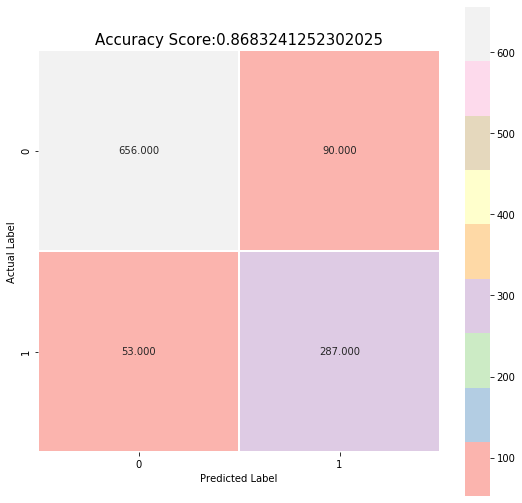

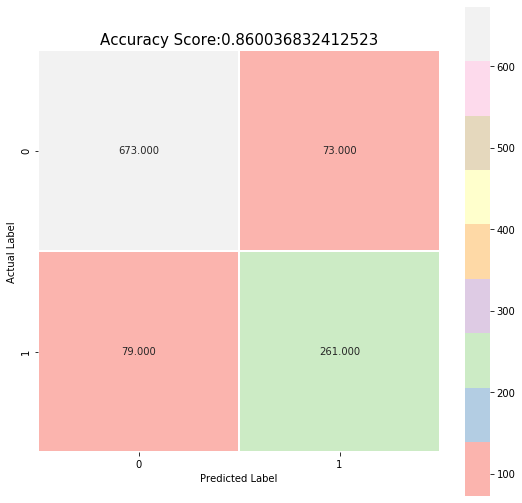

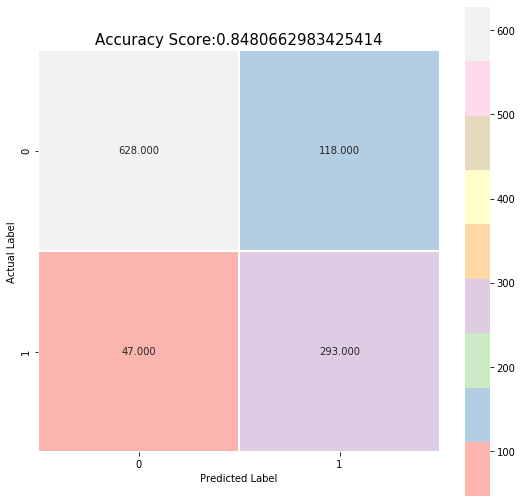

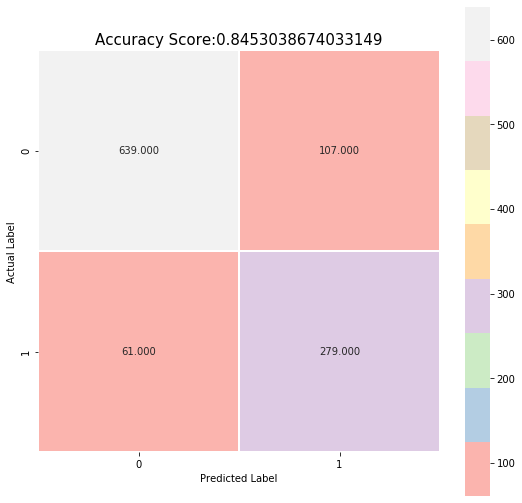

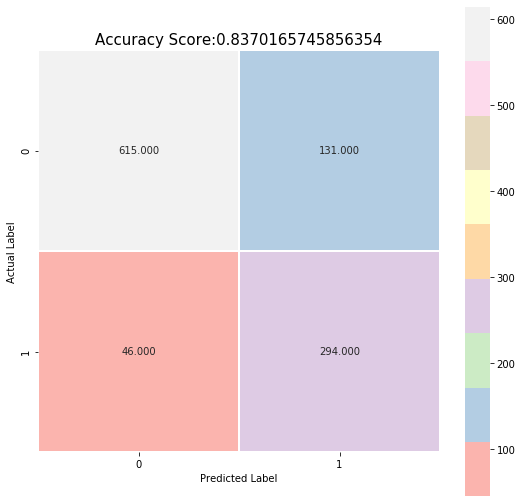

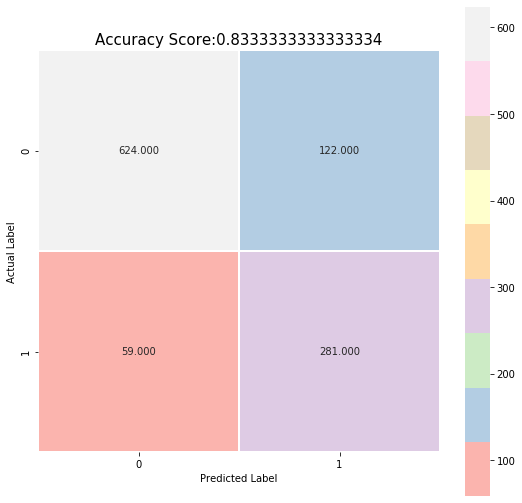

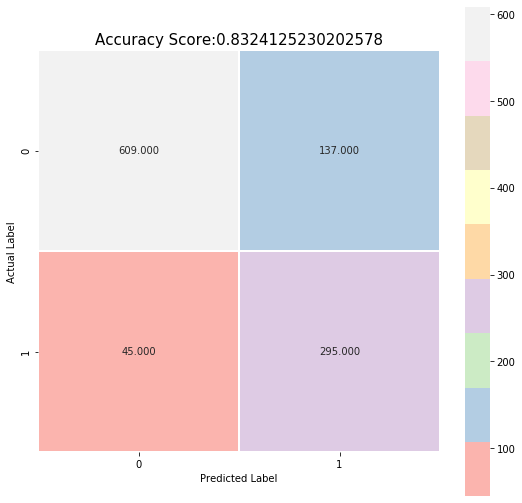

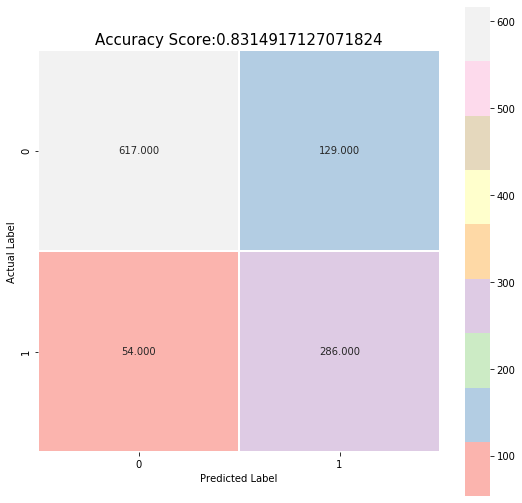

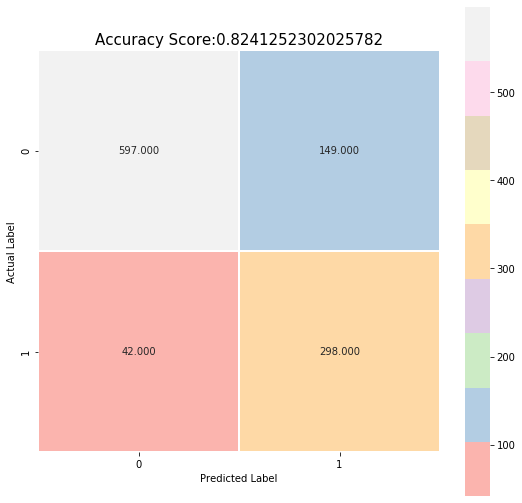

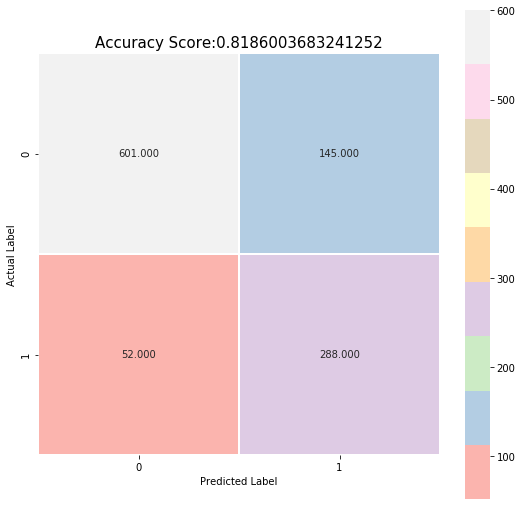

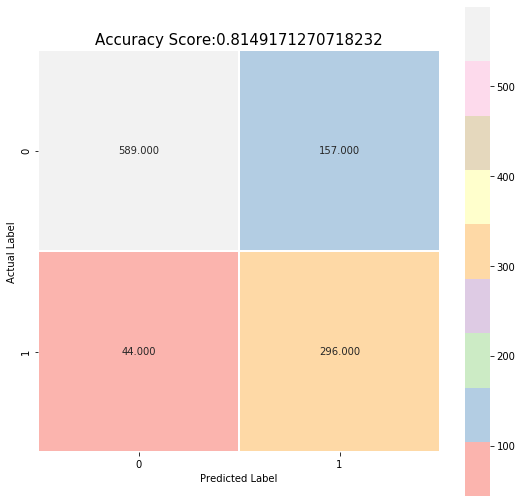

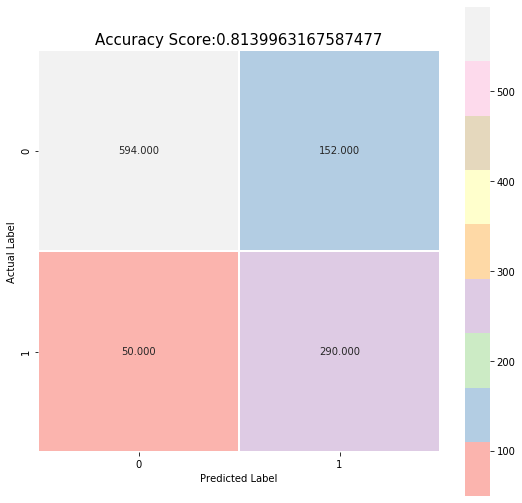

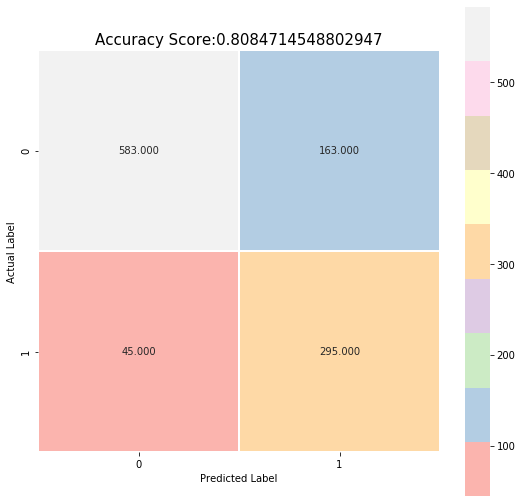

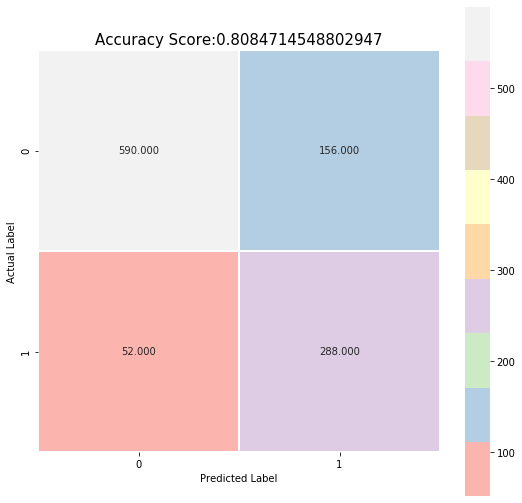

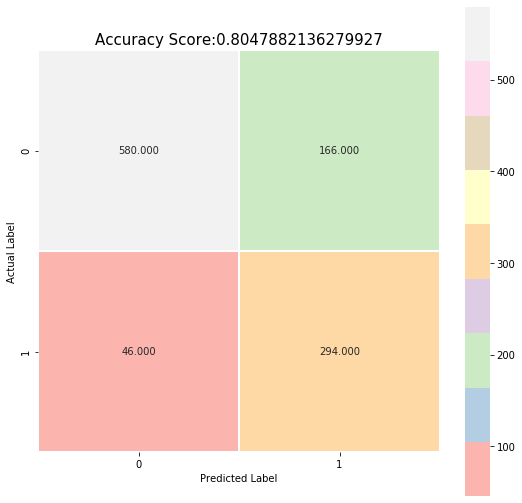

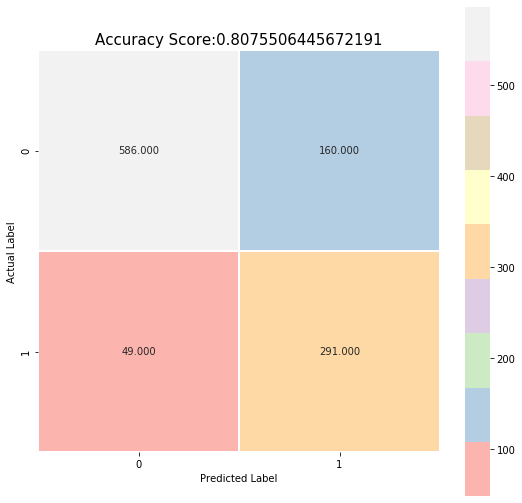

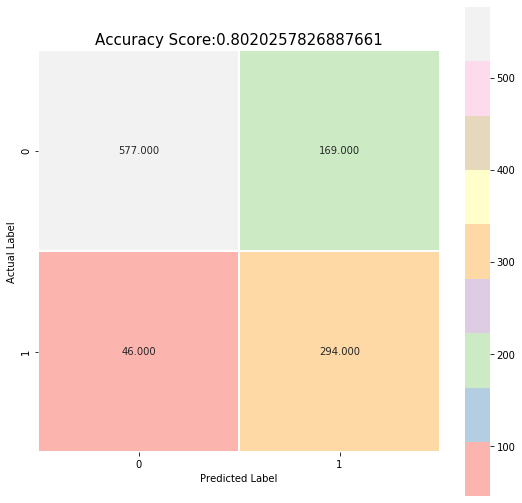

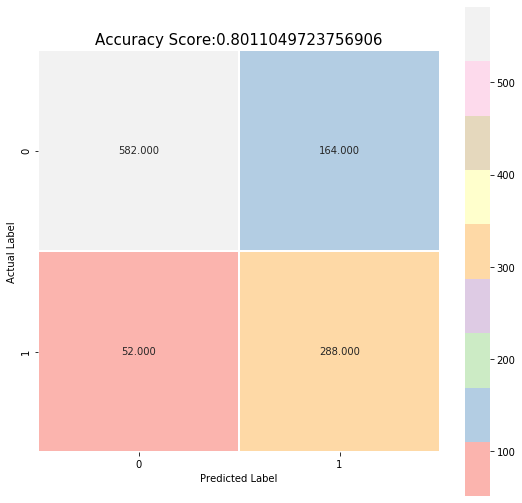

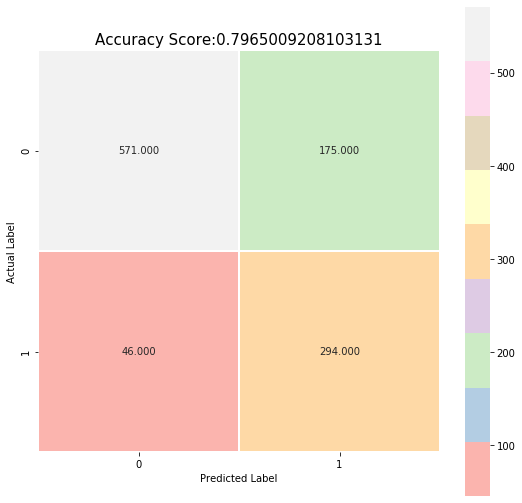

In [17]:
error=[]
for i in range(1,20):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    y_pred = neigh.predict(x_cv)
    
    accuracy = accuracy_score(y_cv, y_pred) 
    print(round(accuracy,2))
    print(classification_report(y_cv, y_pred))
    
    cm = confusion_matrix(y_cv, y_pred)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
    plt.ylabel("Actual Label");
    plt.xlabel("Predicted Label");
    all_sample_title='Accuracy Score:{0}'.format(accuracy)
    plt.title(all_sample_title,size=15);

    print()
    print()
    
    print("*"*100)
    
    

0.87
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1121
           1       0.73      0.85      0.79       431

    accuracy                           0.87      1552
   macro avg       0.83      0.86      0.85      1552
weighted avg       0.88      0.87      0.87      1552



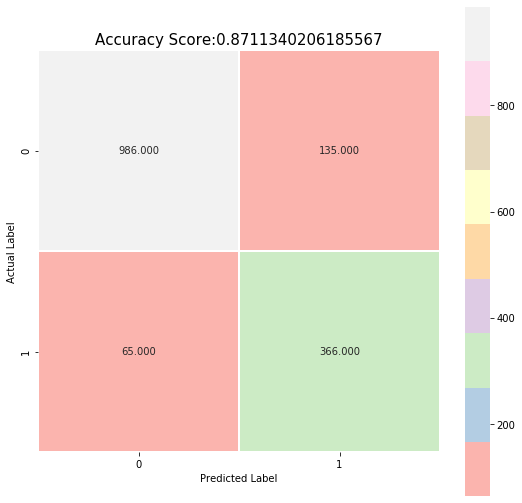

In [18]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(x_train,y_train)
y_pred = neigh.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) 
print(round(accuracy,2))
print(classification_report(y_test, y_pred))
    
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


87 percent accuracy when we use k=1

# Gaussian NB

accuracy =  0.96
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1121
           1       0.96      0.90      0.93       431

    accuracy                           0.96      1552
   macro avg       0.96      0.94      0.95      1552
weighted avg       0.96      0.96      0.96      1552



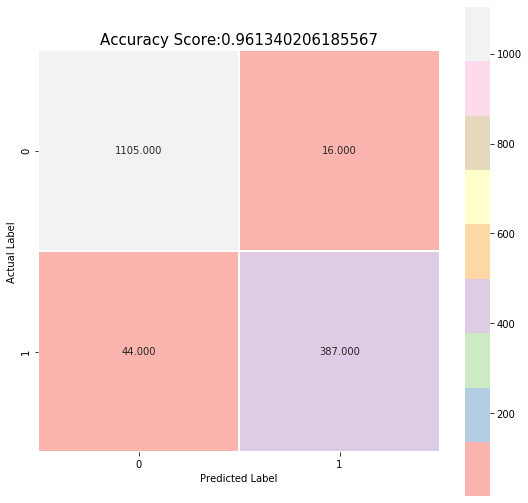

In [19]:
gnb = GaussianNB()
y_pred = gnb.fit(x.toarray(), y).predict(x_test.toarray())

accuracy = accuracy_score(y_test, y_pred) 
print("accuracy = ",round(accuracy,2))
print(classification_report(y_test, y_pred))
    
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Support Vector Classifier

In [20]:
svc_model = svm.SVC(gamma = 'auto',random_state = 0)
svc_model
svc_model.fit(x_train,y_train)
y_pred = svc_model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_test,y_pred))

[0 0 0 ... 0 0 0]
accuracy =  0.73
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      1121
           1       0.90      0.04      0.08       431

    accuracy                           0.73      1552
   macro avg       0.82      0.52      0.46      1552
weighted avg       0.78      0.73      0.63      1552



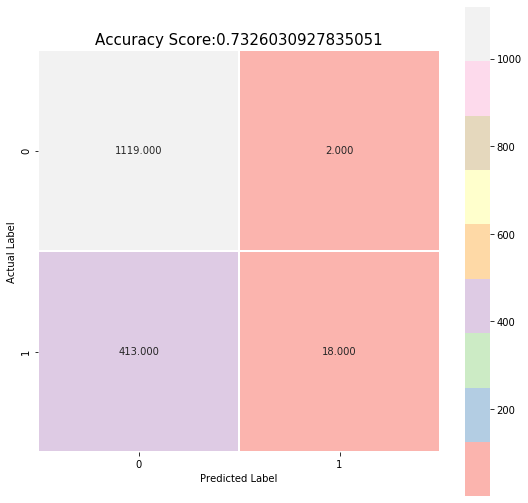

In [21]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Random Forest


In [22]:
random_forest_model = RandomForestClassifier()
random_forest_model.fit(x_train,y_train)
y_pred = random_forest_model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_test,y_pred))

[0 1 0 ... 0 0 0]
accuracy =  0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1121
           1       0.96      0.91      0.94       431

    accuracy                           0.97      1552
   macro avg       0.96      0.95      0.96      1552
weighted avg       0.97      0.97      0.96      1552



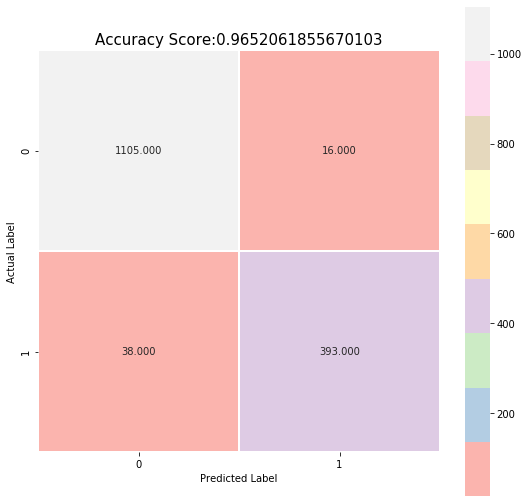

In [23]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Bernoulli NB

In [24]:
bernoulliNB_model = BernoulliNB()
bernoulliNB_model.fit(x_train,y_train)
y_pred = bernoulliNB_model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_test,y_pred))

[0 1 0 ... 0 0 0]
accuracy =  0.83
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1121
           1       0.93      0.41      0.57       431

    accuracy                           0.83      1552
   macro avg       0.87      0.70      0.73      1552
weighted avg       0.85      0.83      0.80      1552



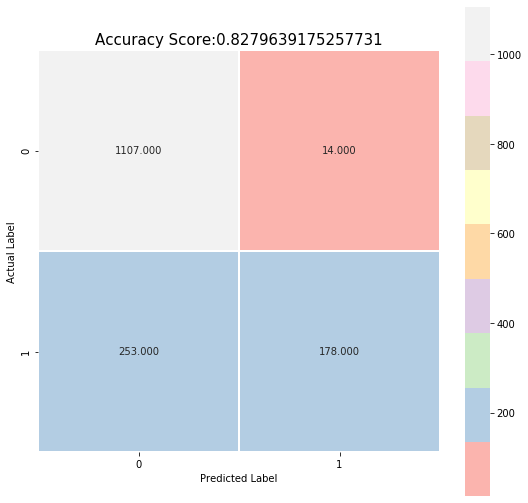

In [25]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


# Gradient Boosting Classifier

In [26]:
gradientBoosting_model = GradientBoostingClassifier()
gradientBoosting_model.fit(x_train,y_train)
y_pred = gradientBoosting_model.predict(x_test)
print(y_pred)
accuracy = accuracy_score(y_test,y_pred)
print("accuracy = ", round(accuracy,2))
print(classification_report(y_test,y_pred))

[0 1 0 ... 0 1 0]
accuracy =  0.95
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1121
           1       0.91      0.93      0.92       431

    accuracy                           0.95      1552
   macro avg       0.94      0.95      0.94      1552
weighted avg       0.95      0.95      0.95      1552



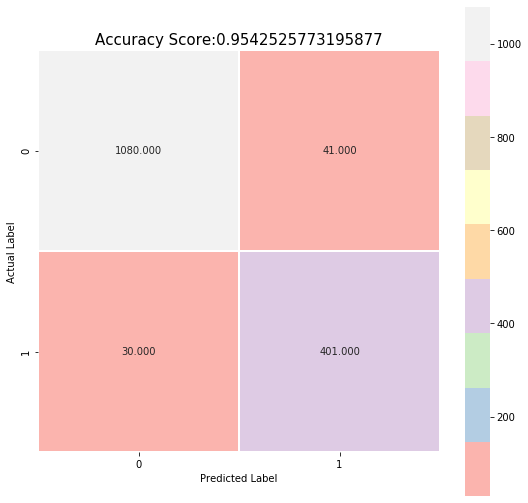

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))

sns.heatmap(cm,annot = True, fmt='.3f',linewidth=.5,square=True,cmap='Pastel1');
plt.ylabel("Actual Label");
plt.xlabel("Predicted Label");
all_sample_title='Accuracy Score:{0}'.format(accuracy)
plt.title(all_sample_title,size=15);


## Save best model

In [28]:
import pickle
pickle.dump(random_forest_model,open('saved model.pkl','wb'))